# Building an Image Classification using the Sequential API
## Intro to Artifical Neural Networks with Keras

In [3]:
import tensorflow as tf
from tensorflow import keras 
print(f'Tensorflow version: {tf.__version__}')
print(f'Tf Keras version: {keras.__version__}')

Tensorflow version: 2.3.0
Tf Keras version: 2.4.0


We begin by fetching some sample data, kindly provided by Keras....

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

Our sample data contains:
- 70K Images - grayscale
- These images represent fashion items 
- Where every image is represented as a 28x28 array
- Where each index in the array is a pixel intensity that also represents an integer (from 0->225).

In [5]:
X_train_full.shape

(60000, 28, 28)

There are 60K images, that each have an array of 28x28

In [6]:
X_train_full.dtype

dtype('uint8')

Before we start, we need to:
* create a validation data set. Lets keep the above test set for the last metric
* scale our input features - as we are training using Gradient Descent
    * we scale by turning all image pixel intensities to fractions over 255.

In [7]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Lets create a list that we can use to find out what the name of the labeled item is in the photo.

In [8]:
class_names = [
    'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
    'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'
]

For example, we can use our list to determine that our first item is a:

In [9]:
class_names[y_train[0]]

'Coat'

# TIME TO BUILD SOME MODELS!

![nn](https://slazebni.cs.illinois.edu/fall18/assignment2/nn.gif)

We will begin by building a neural network using a classification MLP architecture that has two hidden layers. 

In [10]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

above, we:
* build a sequential model - this is the simplest kind of Keras model for NN. They are a single stack of layers connected sequentially
* Our first layer is a Flatten Layer: this converts each single input image (28x28 array) into a 1D array. This is similar to calling .reshape(-1,1). 
    * As it is the input layer/first layer, we need to specify the `input_shape`, which does not include the batch size, it only looks at individual items (in our case the image)
* We then add a dense hidden layer with 300 neurons. It will use ReLU activation function, and will manage its own weight matrix (containing all the connection weights between neurons and their inputs). Each layer also manages a vector of bias terms (one for each neuron) 
* we then add a second dense hidden layer with 100 neurons, also using ReLU
* lastly, we add a dense output layer with 10 neurons (one per class we want to predict), and use a softmax activation function 


In order to analyse this new MLP we have built up, we can use the `summary()` method

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


You can also access different elements of a model, for example, its layers:

In [12]:
model.layers

In [13]:
hidden_1 = model.layers[1]
hidden_1.name

'dense'

In [14]:
model.get_layer('dense') is hidden_1

True

The parameters of a layer can be accessed by `get_weights()` and `set_weights()`

In [15]:
weights, biases = hidden_1.get_weights()

In [16]:
weights

array([[-0.01807385, -0.02856378, -0.06928952, ..., -0.03739739,
        -0.02469813, -0.04949792],
       [-0.00635441,  0.02130676, -0.01527573, ...,  0.06893209,
        -0.01769787, -0.01412964],
       [ 0.00624587, -0.02166998, -0.04752269, ..., -0.06157863,
        -0.03262075,  0.01722796],
       ...,
       [-0.03697686, -0.04369985,  0.03006318, ..., -0.04212937,
         0.06365781, -0.00624066],
       [-0.02039119, -0.02062664, -0.06824194, ..., -0.06935135,
         0.02265548, -0.06642583],
       [ 0.02392022,  0.01844045, -0.03622746, ..., -0.03782555,
         0.00755327, -0.03696645]], dtype=float32)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
weights.shape

(784, 300)

In [19]:
biases.shape

(300,)

From above, you can see that the dense layer has:
* randomly initialised the connection weights (to not break symmetry)
* biases were randomly initialised to zeros 


## Compiling the Model

After you have created the structure of your model, you need to call its `compile()` method. This specifies the loss function and the optimizer to use. 

In [20]:
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)

when we compile, we define:
* loss: this defines the labels - and in our case we have sparse categories (e.g. dress, coat etc). Other options include `catgorical_crossentropy` for when we have one target probability per class for each instance, `binary_crossentropy` for binary classification etc
* optimizer: sgd is using a simple stochastic gradient descent
* metric: useful to measure accuracy during training and evaluation

## Training and Evaluating the Model

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7126 - accuracy: 0.7671 - val_loss: 0.5202 - val_accuracy: 0.8274
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4860 - accuracy: 0.8313 - val_loss: 0.4426 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4413 - accuracy: 0.8466 - val_loss: 0.4151 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4143 - accuracy: 0.8554 - val_loss: 0.4107 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3946 - accuracy: 0.8617 - val_loss: 0.3861 - val_accuracy: 0.8650
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3780 - accuracy: 0.8676 - val_loss: 0.3873 - val_accuracy: 0.8672
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3650 - accuracy: 0.8706 - val_loss: 0.3695 - val_accuracy:

By training and fitting our neural net model, we now get access to:
* `params`: the training parameters
* `epoch`: list of epochs it went through
* `history`: contains the loss and extra metrics if measured at the end of each epoch on the training set and the validation set

Lets take a look at this visually...

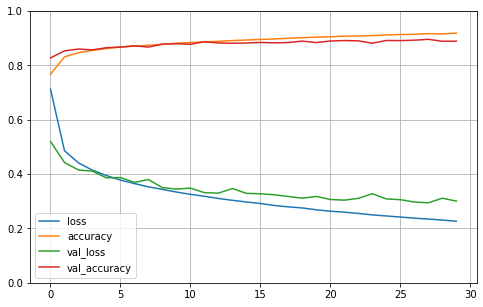

In [22]:
import pandas as pd 
import matplotlib.pyplot as plt 

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

Lets evaluate the model in order to get the generalisation error.

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 992us/step - loss: 71.7777 - accuracy: 0.8396


[71.77767944335938, 0.8396000266075134]

## Lets use the model for predictions!

We will reuse some data to make some predictions

In [24]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

For each instance, the three images we chose from our test set, the model has estimated one probability per output class. Hence, with finding the prediction, you can either use:
* `predict`: predicts probability per class
* `predict_classes`: this returns class with the highest predicted probability

In [25]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [28]:
import numpy as np 

np.argmax(model.predict(X_new), axis=-1)

array([9, 2, 1])